In [5]:
# For intro to AI gym, see https://www.oreilly.com/learning/introduction-to-reinforcement-learning-and-openai-gym

# For blackjack and reinforcement learning, see Example 5.1 p. 76 in Sutton & Barto
# In that example, an infinite deck is used

import blackjack_extended as bjk #The extended Black-Jack environment
import blackjack_base as bjk_base #The standard sum-based Black-Jack environment
from math import inf
import RL as rl
import sys
import os
import numpy as np
import pandas as pd


import plotting as pl
import time
import matplotlib

matplotlib.style.use('ggplot')

directory = "{}/data".format(sys.path[0])
if not os.path.exists(directory):
    os.makedirs(directory)
path_fun = lambda x: "{}/{}_{}.txt".format(directory,x, decks)
# init constants
omega = 0.1        # power decay of the learning rate
n_sims = 10 ** 5    # Number of episodes generated
epsilon = 0.1      # Probability in epsilon-soft strategy
init_val = 0.0
warmup = n_sims//10
# Directory to save plots in
plot_dir = "{}/figures/".format(sys.path[0])



In [7]:

for decks in [inf]:
    print("----- deck number equal to {} -----".format(decks))
    # set seed
    seed = 31233
    # init envs.
    env = bjk.BlackjackEnvExtend(decks=decks, seed=seed)
    sum_env = bjk_base.BlackjackEnvBase(decks=decks, seed=seed)

    print("----- Starting MC training on expanded state space -----")
    # MC-learning wit expanded state representation
    start_time_MC = time.time()
    Q_MC, MC_avg_reward, state_action_count = rl.learn_MC(
        env, n_sims, gamma = 1, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_MC_state"), warmup=warmup)
    print("Number of explored states: " + str(len(Q_MC)))
    print("Cumulative avg. reward = " + str(MC_avg_reward))
    time_to_completion_MC = time.time() - start_time_MC

    print("----- Starting Q-learning on expanded state space -----")
    # Q-learning with expanded state representation
    start_time_expanded = time.time()
    Q, avg_reward, state_action_count = rl.learn_Q(
        env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
    print("Number of explored states: " + str(len(Q)))
    print("Cumulative avg. reward = " + str(avg_reward))
    time_to_completion_expanded = time.time() - start_time_expanded
    
    print("----- Starting Q-learning for sum-based state space -----")
    # Q-learning with player sum state representation
    start_time_sum = time.time()
    sumQ, sum_avg_reward, sum_state_action_count = rl.learn_Q(
        sum_env, n_sims, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("sum_state"), warmup=warmup)
    time_to_completion_sum = time.time() - start_time_sum
    print("Number of explored states (sum states): " + str(len(sumQ)))
    print("Cumulative avg. reward = " + str(sum_avg_reward))

    print("Training time: \n " +
            "Expanded state space MC: {} \n Expanded state space: {} \n Sum state space: {}".format(
                time_to_completion_MC, time_to_completion_expanded, time_to_completion_sum))


    # Convert Q (extended state) to sum state representation and make 3D plots
    # Extended state MC-learning
    Q_conv_MC = rl.convert_to_sum_states(Q_MC, env)
    V_conv_MC = rl.convert_to_value_function(Q_conv_MC)
    V_conv_filt_MC = rl.fill_missing_sum_states(rl.filter_states(V_conv_MC))
    pl.plot_value_function(V_conv_filt_MC,
                            title = "Expanded state MC, " + str(decks) + " decks",
                            directory = plot_dir,
                            file_name = "3D_exp_MC_" + str(decks) + "_decks.png")

    # Extended state Q-learning
    Q_conv = rl.convert_to_sum_states(Q, env)
    V_conv = rl.convert_to_value_function(Q_conv)
    V_conv_filt = rl.fill_missing_sum_states(rl.filter_states(V_conv))
    pl.plot_value_function(V_conv_filt,
                            title = "Expanded state, " + str(decks) + " decks",
                            directory = plot_dir,
                            file_name = "3D_exp_" + str(decks) + "_decks.png")

    # Likewise make 3D plots for sumQ
    V_sum = rl.convert_to_value_function(sumQ)
    V_sum_filt = rl.fill_missing_sum_states(rl.filter_states(V_sum))
    pl.plot_value_function(V_sum_filt,
                            title = "Sum state, " + str(decks) + " decks",
                            directory = plot_dir,
                            file_name = "3D_sum_" + str(decks) + "_decks.png")
    # create line plots
    env_types = ["hand_MC", "hand", "sum"]
    fig, lgd = pl.plot_avg_reward_episode(directory, env_types, [str(decks)])
    fig.savefig("{}/avgReturnEp_ndeck{}.png".format(plot_dir, decks),
                            bbox_extra_artists=(lgd,), bbox_inches='tight')
    matplotlib.pyplot.close(fig)


----- deck number equal to inf -----
----- Starting MC training on expanded state space -----
Mean avg reward, after 1000 episodes: -0.30730730730730743
Mean avg reward, after 2000 episodes: -0.28964482241120587
Mean avg reward, after 3000 episodes: -0.24624874958319448
Mean avg reward, after 4000 episodes: -0.2335583895973991
Mean avg reward, after 5000 episodes: -0.22074414882976623
Mean avg reward, after 6000 episodes: -0.21086847807968
Mean avg reward, after 7000 episodes: -0.1999571367338191
Mean avg reward, after 8000 episodes: -0.19814976872109014
Mean avg reward, after 9000 episodes: -0.19274363818202017
Mean avg reward, after 10000 episodes: -0.18866886688668832
Mean avg reward, after 11000 episodes: -0.18978998090735488
Mean avg reward, after 12000 episodes: -0.18714059504958744
Mean avg reward, after 13000 episodes: -0.18262943303331014
Mean avg reward, after 14000 episodes: -0.18215586827630528
Mean avg reward, after 15000 episodes: -0.1766784452296816
Mean avg reward, afte

In [14]:
#Best decay rate
omega = 0.1        # power decay of the learning rate
n_sims = 10 ** 5    # Number of episodes generated
epsilon = 0.1      
init_val = 0.0
warmup = n_sims//10
omegas = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
epsilons = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

decks = inf
seed = 42
env = bjk.BlackjackEnvExtend(decks=decks, seed=seed)
sum_env = bjk_base.BlackjackEnvBase(decks=decks, seed=seed)



In [15]:
Qs_extended = []
avg_rewards_extended = []
for omega in omegas:
    Q, avg_reward, state_action_count = rl.learn_Q(
        env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
    Qs_extended.append(Q)
    avg_rewards_extended.append(avg_reward)
   


Mean avg reward, after 1000 episodes: -0.20100000000000007
Mean avg reward, after 2000 episodes: -0.16574999999999976
Mean avg reward, after 3000 episodes: -0.16733333333333342
Mean avg reward, after 4000 episodes: -0.1481250000000002
Mean avg reward, after 5000 episodes: -0.12980000000000078
Mean avg reward, after 6000 episodes: -0.1155000000000006
Mean avg reward, after 7000 episodes: -0.11478571428571495
Mean avg reward, after 8000 episodes: -0.1109375000000005
Mean avg reward, after 9000 episodes: -0.11400000000000025
Mean avg reward, after 10000 episodes: -0.10950000000000017
Mean avg reward, after 11000 episodes: -0.10645454545454563
Mean avg reward, after 12000 episodes: -0.10716666666666688
Mean avg reward, after 13000 episodes: -0.11146153846153861
Mean avg reward, after 14000 episodes: -0.10828571428571439
Mean avg reward, after 15000 episodes: -0.1111000000000001
Mean avg reward, after 16000 episodes: -0.1127812500000002
Mean avg reward, after 17000 episodes: -0.111588235294

In [16]:
best_omega_extended = omegas[np.argmax(np.array(avg_rewards_extended))]
print("Best decay rate: {}".format(best_omega_extended))
print("Yielded a final avg. reward of {}".format(avg_rewards_extended[np.argmax(np.array(avg_rewards_extended))]))

Best decay rate: 0.05
Yielded a final avg. reward of -0.07614923850761372


    Decay Rate (ω)  Average Reward
1             0.05       -0.076149
2             0.10       -0.078999
0             0.01       -0.085599
5             0.40       -0.085864
7             0.60       -0.086434
3             0.20       -0.087859
4             0.30       -0.088414
9             0.80       -0.089819
10            0.90       -0.095254
6             0.50       -0.095364
8             0.70       -0.097324
11            1.00       -0.159758


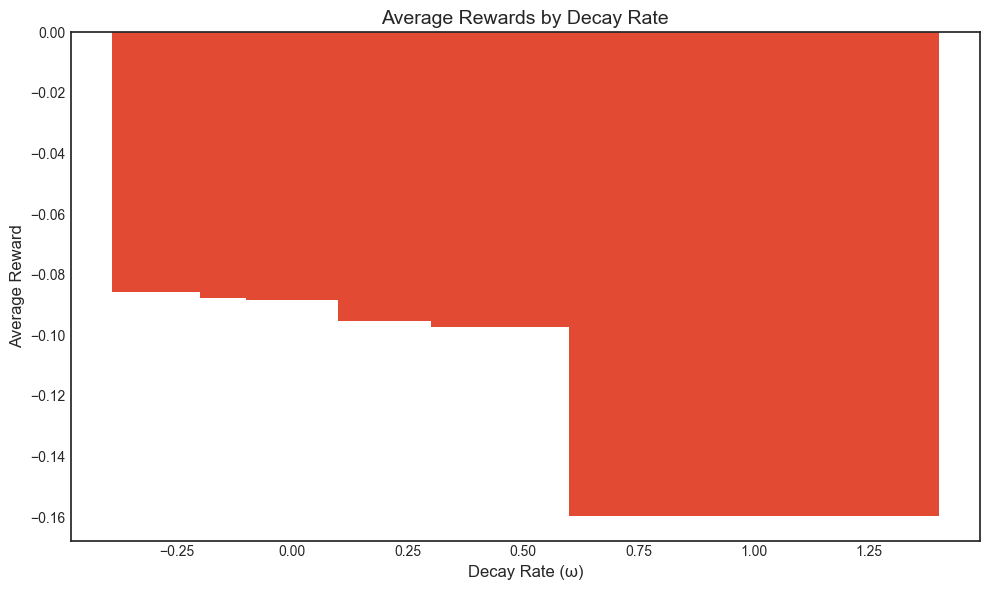


Best Decay Rate: 0.05
Best Average Reward: -0.07614923850761372


In [19]:
import pandas as pd

# Convert to numpy arrays for easier manipulation
omegas_array = np.array(omegas)
avg_rewards_array = np.array(avg_rewards_extended)

# Create a DataFrame for clear visualization
rewards_matrix = pd.DataFrame({
    'Decay Rate (ω)': omegas_array,
    'Average Reward': avg_rewards_array
})

# Sort by average reward in descending order
rewards_matrix = rewards_matrix.sort_values('Average Reward', ascending=False)

# Print the matrix
print(rewards_matrix)


In [28]:
Qs_base = []
avg_rewards_base = []
for omega in omegas:
    Q, avg_reward, state_action_count = rl.learn_Q(
        sum_env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
    Qs_base.append(Q)
    avg_rewards_base.append(avg_reward)
   


Mean avg reward, after 1000 episodes: -0.2144999999999998
Mean avg reward, after 2000 episodes: -0.16424999999999967
Mean avg reward, after 3000 episodes: -0.16083333333333344
Mean avg reward, after 4000 episodes: -0.1480000000000002
Mean avg reward, after 5000 episodes: -0.14010000000000025
Mean avg reward, after 6000 episodes: -0.1317499999999999
Mean avg reward, after 7000 episodes: -0.11778571428571416
Mean avg reward, after 8000 episodes: -0.09987499999999994
Mean avg reward, after 9000 episodes: -0.1061666666666664
Mean avg reward, after 10000 episodes: -0.10209999999999977
Mean avg reward, after 11000 episodes: -0.09799999999999977
Mean avg reward, after 12000 episodes: -0.09908333333333318
Mean avg reward, after 13000 episodes: -0.09723076923076893
Mean avg reward, after 14000 episodes: -0.09882142857142838
Mean avg reward, after 15000 episodes: -0.09793333333333314
Mean avg reward, after 16000 episodes: -0.09912499999999994
Mean avg reward, after 17000 episodes: -0.09723529411

In [29]:
best_omega_base = omegas[np.argmax(np.array(avg_rewards_base))]
print("Best decay rate: {}".format(best_omega_base))
print("Yielded a final avg. reward of {}".format(avg_rewards_base[np.argmax(np.array(avg_rewards_base))]))

Best decay rate: 0.3
Yielded a final avg. reward of -0.05663943360566454


In [30]:
# Create a DataFrame for clear visualization
rewards_matrix_base = pd.DataFrame({
    'Decay Rate (ω)': omegas,
    'Average Reward': avg_rewards_base
})

# Sort by average reward in descending order
rewards_matrix_base = rewards_matrix_base.sort_values('Average Reward', ascending=False)
# Print the matrix
print("Base Environment Rewards:")
print(rewards_matrix_base)


Base Environment Rewards:
    Decay Rate (ω)  Average Reward
4             0.30       -0.056639
1             0.05       -0.056749
5             0.40       -0.057584
2             0.10       -0.058709
3             0.20       -0.061259
7             0.60       -0.063234
0             0.01       -0.063964
6             0.50       -0.064064
10            0.90       -0.065869
9             0.80       -0.066374
8             0.70       -0.072154
11            1.00       -0.166558


In [51]:
Qs_extended_epsilon = []
avg_rewards_extended_epsilon = []
omega = 0.05
for epsilon in epsilons:
    Q, avg_reward, state_action_count = rl.learn_Q(
        env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
    Qs_extended_epsilon.append(Q)
    avg_rewards_extended_epsilon.append(avg_reward)

Qs_base_epsilon = []
avg_rewards_base_epsilon = []
for epsilon in epsilons:
    Q, avg_reward, state_action_count = rl.learn_Q(
        sum_env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
    Qs_base_epsilon.append(Q)
    avg_rewards_base_epsilon.append(avg_reward)
   

Mean avg reward, after 1000 episodes: -0.24700000000000033
Mean avg reward, after 2000 episodes: -0.22699999999999998
Mean avg reward, after 3000 episodes: -0.2105
Mean avg reward, after 4000 episodes: -0.20074999999999973
Mean avg reward, after 5000 episodes: -0.20119999999999957
Mean avg reward, after 6000 episodes: -0.20399999999999943
Mean avg reward, after 7000 episodes: -0.19385714285714215
Mean avg reward, after 8000 episodes: -0.19062499999999952
Mean avg reward, after 9000 episodes: -0.18783333333333257
Mean avg reward, after 10000 episodes: -0.18394999999999936
Mean avg reward, after 11000 episodes: -0.17759090909090847
Mean avg reward, after 12000 episodes: -0.17329166666666612
Mean avg reward, after 13000 episodes: -0.16626923076923045
Mean avg reward, after 14000 episodes: -0.16496428571428529
Mean avg reward, after 15000 episodes: -0.157366666666666
Mean avg reward, after 16000 episodes: -0.1504687499999991
Mean avg reward, after 17000 episodes: -0.14876470588235233
Mean 

In [52]:
best_epsilon_extended = epsilons[np.argmax(np.array(avg_rewards_extended_epsilon))]
print("Best decay rate: {}".format(best_epsilon_extended))
print("Yielded a final avg. reward of {}".format(avg_rewards_extended_epsilon[np.argmax(np.array(avg_rewards_extended_epsilon))]))


best_epsilon_base = epsilons[np.argmax(np.array(avg_rewards_base_epsilon))]
print("Best decay rate: {}".format(best_epsilon_base))
print("Yielded a final avg. reward of {}".format(avg_rewards_base_epsilon[np.argmax(np.array(avg_rewards_base_epsilon))]))



Best decay rate: 0.1
Yielded a final avg. reward of -0.0769142308576921
Best decay rate: 0.2
Yielded a final avg. reward of -0.0459245407545928


In [53]:
# Matrix for Extended Environment (Epsilon Variation)
rewards_matrix_extended_epsilon = pd.DataFrame({
    'Exploration Rate (ε)': epsilons,
    'Average Reward': avg_rewards_extended_epsilon
})
rewards_matrix_extended_epsilon = rewards_matrix_extended_epsilon.sort_values('Exploration Rate (ε)')

print("Extended Environment Rewards (Epsilon Variation):")
print(rewards_matrix_extended_epsilon)

# Find the best epsilon (highest average reward)
best_epsilon_extended = rewards_matrix_extended_epsilon.loc[
    rewards_matrix_extended_epsilon['Average Reward'].idxmax(), 
    'Exploration Rate (ε)'
]
best_reward_extended_epsilon = rewards_matrix_extended_epsilon['Average Reward'].max()

print(f"\nBest Exploration Rate (Extended): {best_epsilon_extended}")
print(f"Best Average Reward (Extended): {best_reward_extended_epsilon}")

# Matrix for Base Environment (Epsilon Variation)
rewards_matrix_base_epsilon = pd.DataFrame({
    'Exploration Rate (ε)': epsilons,
    'Average Reward': avg_rewards_base_epsilon
})
rewards_matrix_base_epsilon = rewards_matrix_base_epsilon.sort_values('Exploration Rate (ε)')

print("\nBase Environment Rewards (Epsilon Variation):")
print(rewards_matrix_base_epsilon)

# Find the best epsilon (highest average reward)
best_epsilon_base = rewards_matrix_base_epsilon.loc[
    rewards_matrix_base_epsilon['Average Reward'].idxmax(), 
    'Exploration Rate (ε)'
]
best_reward_base_epsilon = rewards_matrix_base_epsilon['Average Reward'].max()

print(f"\nBest Exploration Rate (Base): {best_epsilon_base}")
print(f"Best Average Reward (Base): {best_reward_base_epsilon}")

Extended Environment Rewards (Epsilon Variation):
   Exploration Rate (ε)  Average Reward
9                   0.1       -0.076914
8                   0.2       -0.078729
7                   0.3       -0.081484
6                   0.4       -0.085789
5                   0.5       -0.085594
4                   0.6       -0.097624
3                   0.7       -0.093269
2                   0.8       -0.104684
1                   0.9       -0.097929
0                   1.0       -0.105064

Best Exploration Rate (Extended): 0.1
Best Average Reward (Extended): -0.0769142308576921

Base Environment Rewards (Epsilon Variation):
   Exploration Rate (ε)  Average Reward
9                   0.1       -0.053579
8                   0.2       -0.045925
7                   0.3       -0.050899
6                   0.4       -0.050634
5                   0.5       -0.052269
4                   0.6       -0.060434
3                   0.7       -0.050189
2                   0.8       -0.051114
1           

In [ ]:
#Best setup for the extended space. Omega = 0.01, Epsilon = 0.1
#Best setup for the base space. Omega = 0.05, Epsilon = 0.7

In [59]:
#Optimal strategy from the best parameters S_1
omega = 0.05
epsilon = 0.1
n_sims = 500000
#maybe wanna train these for longer?
Q, avg_reward, state_action_count = rl.learn_Q(
        env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
        episode_file=path_fun("hand_state"), warmup=warmup)
Q_conv = rl.convert_to_sum_states(Q, env)
V_conv = rl.convert_to_value_function(Q_conv)
Q_conv_filt = rl.fill_missing_sum_states(rl.filter_states(Q_conv))

pl.plot_policy(Q_conv_filt,
            title = "Expanded state, " + str(decks) + " decks, optimal policy ",
            directory = plot_dir,
            file_name = "expanded_optimal_policy2_" + str(decks) + "_decks.png")



# omega = 0.05
# epsilon = 0.7
# Q, avg_reward, state_action_count = rl.learn_Q(
#         sum_env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
#         episode_file=path_fun("hand_state"), warmup=warmup)
# Q_conv = rl.convert_to_sum_states(Q, sum_env)
# V_conv = rl.convert_to_value_function(Q_conv)
# Q_conv_filt = rl.fill_missing_sum_states(rl.filter_states(Q_conv))




Mean avg reward, after 5000 episodes: -0.1414999999999998
Mean avg reward, after 10000 episodes: -0.11749999999999991
Mean avg reward, after 15000 episodes: -0.10759999999999979
Mean avg reward, after 20000 episodes: -0.10324999999999955
Mean avg reward, after 25000 episodes: -0.10253999999999953
Mean avg reward, after 30000 episodes: -0.0994166666666661
Mean avg reward, after 35000 episodes: -0.09751428571428487
Mean avg reward, after 40000 episodes: -0.09291249999999909
Mean avg reward, after 45000 episodes: -0.09006666666666577
Mean avg reward, after 50000 episodes: -0.08940999999999921
Mean avg reward, after 55000 episodes: -0.0864454545454536
Mean avg reward, after 60000 episodes: -0.0854666666666658
Mean avg reward, after 65000 episodes: -0.08482307692307654
Mean avg reward, after 70000 episodes: -0.08307857142857052
Mean avg reward, after 75000 episodes: -0.08221333333333287
Mean avg reward, after 80000 episodes: -0.08288124999999925
Mean avg reward, after 85000 episodes: -0.082

In [58]:
#Doesnt really work for some reason
# #Optimal strategy from the best parameters S_2
# omega = 0.3
# epsilon = 0.2
# #maybe wanna train these for longer?
# Q, avg_reward, state_action_count = rl.learn_Q(
#         sum_env, n_sims, gamma = 1, omega = omega, epsilon = epsilon, init_val = init_val,
#         episode_file=path_fun("hand_state"), warmup=warmup)
# Q_conv = rl.convert_to_sum_states(Q, sum_env)
# V_conv = rl.convert_to_value_function(Q_conv)
# Q_conv_filt = rl.fill_missing_sum_states(rl.filter_states(Q_conv))


# pl.plot_policy(Q_conv_filt,
#             title = "Base state, " + str(decks) + " decks, optimal policy ",
#             directory = plot_dir,
#             file_name = "base_optimal_policy_" + str(decks) + "_decks.png")
